# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [174]:
import pandas as pd 
from matplotlib import pyplot
import matplotlib  
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

In [3]:
df = pd.read_csv('zillow_data.csv')

In [88]:
df.drop(columns= 'RegionID',inplace=True)
df.drop(columns= 'SizeRank',inplace=True)

# Step 2: Data Preprocessing

In [89]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [90]:
get_datetimes(df)

DatetimeIndex(['1996-06-01', '1996-07-01', '1996-08-01', '1996-09-01',
               '1996-10-01', '1996-11-01', '1996-12-01', '1997-01-01',
               '1997-02-01', '1997-03-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=263, freq=None)

In [91]:
cities = ['Austin', 'Raleigh','Atlanta','Phoenix','Miami','Huntsville','Baltimore']

In [92]:
selected = df[df['City'].isin(cities)]

In [93]:
selected

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
56,85032,Phoenix,AZ,Phoenix,Maricopa,95400.0,95800.0,96200.0,96700.0,97200.0,...,255000,256300,257800,259500,260700,261900,263100,264100,265400,266400
66,78704,Austin,TX,Austin,Travis,221300.0,221100.0,221000.0,221000.0,221300.0,...,530100,532400,534200,536200,538200,539800,540200,542300,547100,550900
98,78745,Austin,TX,Austin,Travis,135000.0,134200.0,133800.0,133800.0,134000.0,...,286300,286900,287500,288700,289800,290500,291300,292600,294000,294700
172,27610,Raleigh,NC,Raleigh,Wake,113000.0,111700.0,110400.0,109400.0,108700.0,...,156500,158000,159500,161000,162200,163200,164200,165600,167500,168800
227,30331,Atlanta,GA,Atlanta,Fulton,97100.0,97700.0,98400.0,99100.0,100000.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10214,30363,Atlanta,GA,Atlanta,Fulton,131400.0,131700.0,132000.0,132300.0,132800.0,...,350600,350200,349700,347900,345100,343000,342100,341200,340900,340300
11912,43324,Huntsville,OH,Bellefontaine,Logan,91200.0,91900.0,92600.0,93400.0,94100.0,...,189300,190600,192500,193700,194200,195500,196800,198200,200900,203800
12887,65259,Huntsville,MO,Moberly,Randolph,NaN,NaN,NaN,NaN,NaN,...,110600,112500,113200,111000,106900,104100,102800,102400,104100,106800
13256,61723,Atlanta,IL,Lincoln,Logan,41500.0,41600.0,41700.0,41700.0,41800.0,...,84100,84400,85000,85700,86100,86800,87500,87600,86800,85900


In [94]:
dfBA = df[df['Metro'] == 'Baltimore']
dfA = df[df['Metro'] =='Atlanta']
dfH = df[df['Metro'] =='Houston']
dfM = df[df['Metro'] =='Miami-Fort Lauderdale']
dfPH = df[df['Metro'] =='Philadelphia']
dfPX = df[df['Metro'] =='Phoenix']
dfR = df[df['Metro'] == 'Raleigh']
dfHV = df[df['Metro'] == 'Huntsville']
# E = [df1,df2,df3,df4,df5,df6] raleigh huntsville

In [95]:
dfBA.shape

(122, 270)

In [96]:
dfA.shape

(152, 270)

In [97]:
dfH.shape

(187, 270)

In [98]:
dfM.shape

(162, 270)

In [99]:
dfPH.shape

(281, 270)

In [100]:
dfPX.shape

(126, 270)

In [101]:
dfR.shape

(43, 270)

In [102]:
dfHV.shape

(24, 270)

In [103]:
# Need to see which columns have null values
print(dfM.columns[dfM.isna().any()].tolist(),'1')
ATLA = dfA.columns[dfA.isna().any()].tolist()
PHON = dfPX.columns[dfPX.isna().any()].tolist()
BALT = dfBA.columns[dfBA.isna().any()].tolist()
print (dfPH.columns[dfH.isna().any()].tolist(),'5')
print(dfH.columns[dfH.isna().any()].tolist(),'6')
print(dfR.columns[dfR.isna().any()].tolist(),'7')
HUNT = dfHV.columns[dfHV.isna().any()].tolist()

[] 1
[] 5
[] 6
[] 7


In [104]:
Atlanta = dfA.fillna(dfA.mean())
Phoenix = dfPX.fillna(dfPX.mean())
Baltimore = dfBA.fillna(dfBA.mean())
Huntsville = dfHV.fillna(dfHV.mean())
Houston = dfH
Miami = dfM
Raleigh = dfR
Philadelphia = dfPH

In [45]:
# EmergingCitys = pd.concat(E,axis=0)

In [18]:
# EmergingCitys

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
316,66825,21215,Baltimore,MD,Baltimore,Baltimore City,317,53500.0,53500.0,53400.0,...,59400,61400,63200,64100,65100,66800,67400,69500,72900,75000
441,66834,21224,Baltimore,MD,Baltimore,Baltimore City,442,49600.0,49400.0,49200.0,...,156900,161000,165800,168800,171100,173800,176400,177900,177500,176600
605,66828,21218,Baltimore,MD,Baltimore,Baltimore City,606,44700.0,44700.0,44700.0,...,73000,74500,76400,78100,81100,84800,88200,91800,96400,99900
677,66816,21206,Baltimore,MD,Baltimore,Baltimore City,678,73200.0,73300.0,73500.0,...,113100,115700,118400,119800,121100,123400,126600,129600,132400,135200
1004,66839,21229,Baltimore,MD,Baltimore,Baltimore City,1005,56000.0,56200.0,56500.0,...,77300,80000,83000,84400,85400,86100,86500,88400,92400,95600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,94767,85054,Phoenix,AZ,Phoenix,Maricopa,8219,185200.0,186300.0,187200.0,...,482800,486400,489800,494000,497400,500200,502900,503900,502700,502200
8631,94728,85012,Phoenix,AZ,Phoenix,Maricopa,8632,157100.0,158000.0,158900.0,...,530500,531200,530000,530600,533700,535300,533300,533100,537800,542400
9869,94761,85045,Phoenix,AZ,Phoenix,Maricopa,9870,190700.0,191900.0,193100.0,...,368400,370200,371200,372200,372900,373400,373800,374600,376500,378600
9871,66791,21131,Phoenix,MD,Baltimore,Baltimore,9872,278600.0,277500.0,276200.0,...,495100,497100,500400,502100,504000,505500,508200,510800,514000,515400


In [59]:
# dfBA.dropna(inplace=True)
# dfA.dropna(inplace=True)
# dfH.dropna(inplace=True)
# dfM.dropna(inplace=True)
# dfPH.dropna(inplace=True)
# dfPX.dropna(inplace=True)
# dfR.dropna(inplace=True)
# dfHV.dropna(inplace=True)

/Users/andrewghan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is sepa

In [19]:
# EmergingCitys.drop(columns= 'RegionID',inplace=True)
# EmergingCitys.drop(columns= 'SizeRank',inplace=True)

In [20]:
EmergingCitys

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
316,21215,Baltimore,MD,Baltimore,Baltimore City,53500.0,53500.0,53400.0,53300.0,53300.0,...,59400,61400,63200,64100,65100,66800,67400,69500,72900,75000
441,21224,Baltimore,MD,Baltimore,Baltimore City,49600.0,49400.0,49200.0,48900.0,48600.0,...,156900,161000,165800,168800,171100,173800,176400,177900,177500,176600
605,21218,Baltimore,MD,Baltimore,Baltimore City,44700.0,44700.0,44700.0,44700.0,44700.0,...,73000,74500,76400,78100,81100,84800,88200,91800,96400,99900
677,21206,Baltimore,MD,Baltimore,Baltimore City,73200.0,73300.0,73500.0,73600.0,73700.0,...,113100,115700,118400,119800,121100,123400,126600,129600,132400,135200
1004,21229,Baltimore,MD,Baltimore,Baltimore City,56000.0,56200.0,56500.0,56900.0,57300.0,...,77300,80000,83000,84400,85400,86100,86500,88400,92400,95600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,85054,Phoenix,AZ,Phoenix,Maricopa,185200.0,186300.0,187200.0,188200.0,189200.0,...,482800,486400,489800,494000,497400,500200,502900,503900,502700,502200
8631,85012,Phoenix,AZ,Phoenix,Maricopa,157100.0,158000.0,158900.0,159700.0,160500.0,...,530500,531200,530000,530600,533700,535300,533300,533100,537800,542400
9869,85045,Phoenix,AZ,Phoenix,Maricopa,190700.0,191900.0,193100.0,194300.0,195400.0,...,368400,370200,371200,372200,372900,373400,373800,374600,376500,378600
9871,21131,Phoenix,MD,Baltimore,Baltimore,278600.0,277500.0,276200.0,274800.0,273400.0,...,495100,497100,500400,502100,504000,505500,508200,510800,514000,515400


# Step 3: EDA and Visualization

In [13]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [105]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [107]:
MAtlanta= melt_data(Atlanta)  
MPhoenix= melt_data(Phoenix)
MBaltimore= melt_data(Baltimore)
MHuntsville= melt_data(Huntsville)
MHouston= melt_data(Houston) 
MMiami= melt_data(Miami)
MRaleigh= melt_data(Raleigh) 
MPhiladelphia= melt_data(Philadelphia)

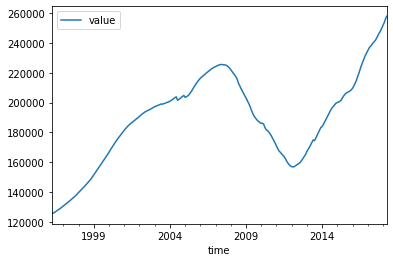

In [133]:
MAtlanta.plot()
pyplot.show()

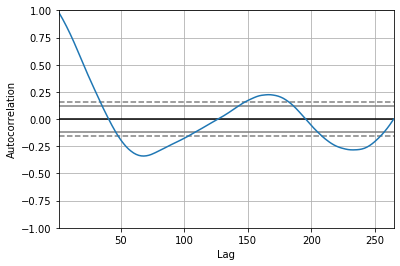

In [114]:
autocorrelation_plot(MAtlanta)
pyplot.show()

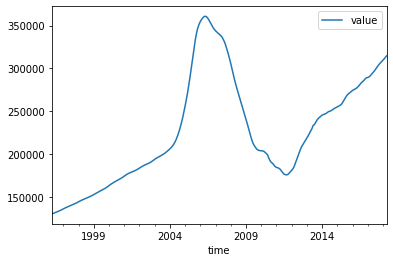

In [134]:
MPhoenix.plot()
pyplot.show()

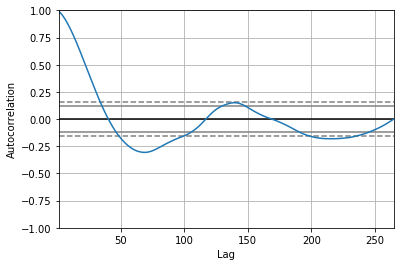

In [115]:
autocorrelation_plot(MPhoenix)
pyplot.show()

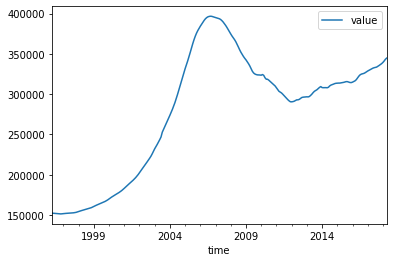

In [135]:
MBaltimore.plot()
pyplot.show()

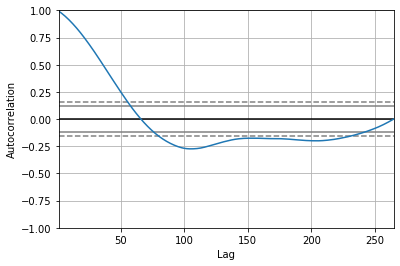

In [113]:
autocorrelation_plot(MBaltimore)
pyplot.show()

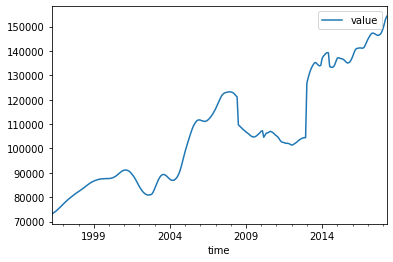

In [136]:
MHuntsville.plot()
pyplot.show()

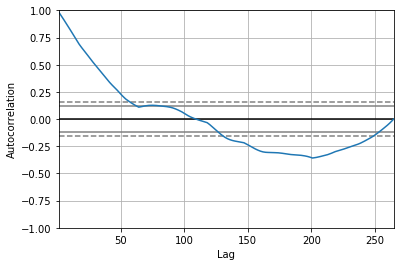

In [116]:
autocorrelation_plot(MHuntsville)
pyplot.show()

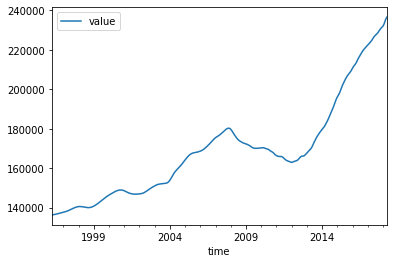

In [137]:
MHouston.plot()
pyplot.show()

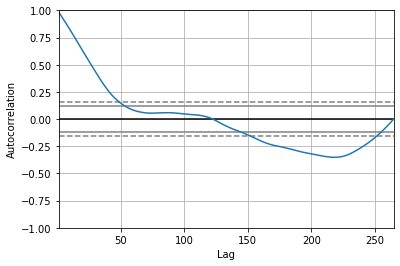

In [117]:
autocorrelation_plot(MHouston)
pyplot.show()

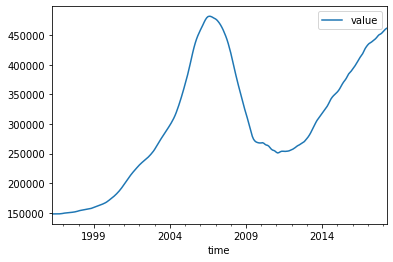

In [138]:
MMiami.plot()
pyplot.show()

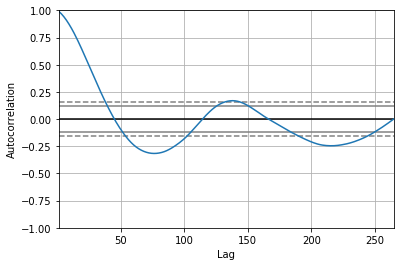

In [118]:
autocorrelation_plot(MMiami)
pyplot.show()

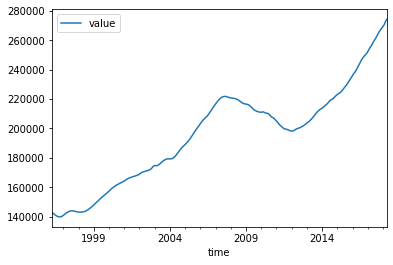

In [139]:
MRaleigh.plot()
pyplot.show()

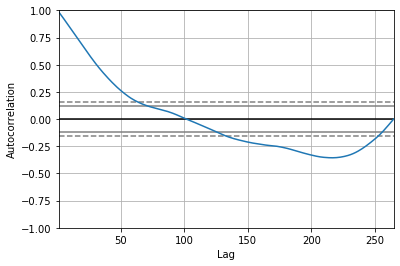

In [119]:
autocorrelation_plot(MRaleigh)
pyplot.show()

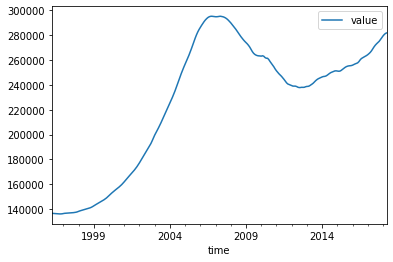

In [140]:
MPhiladelphia.plot()
pyplot.show()

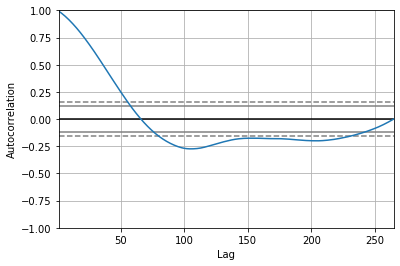

In [120]:
autocorrelation_plot(MPhiladelphia)
pyplot.show()

In [169]:
MP= MPhiladelphia['value']
MP

time
1996-04-01    136675.444840
1996-05-01    136610.320285
1996-06-01    136524.911032
1996-07-01    136418.505338
1996-08-01    136317.081851
                  ...      
2017-12-01    277848.754448
2018-01-01    279333.807829
2018-02-01    280505.338078
2018-03-01    281412.455516
2018-04-01    281849.466192
Name: value, Length: 265, dtype: float64

In [170]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(MP)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# Your code here

ADF Statistic: -2.324435
p-value: 0.164208
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


# Step 5: ARIMA Modeling

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  264
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1773.370
Method:                       css-mle   S.D. of innovations            198.759
Date:                Tue, 05 May 2020   AIC                           3552.740
Time:                        15:55:10   BIC                           3563.468
Sample:                    05-01-1996   HQIC                          3557.051
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           442.1228    565.353      0.782      0.435    -665.948    1550.194
ar.L1.D.value     0.9817      0.010     98.120      0.000       0.962       1.001
                                    Root

/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


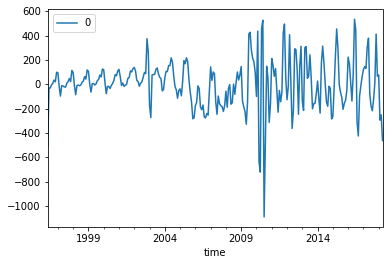

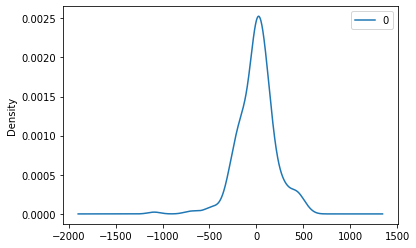

                 0
count   264.000000
mean      1.953463
std     201.479974
min   -1088.553286
25%    -108.841931
50%       7.618393
75%     101.832282
max     533.684043


In [176]:
model = ARIMA(MP, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Step 6: Interpreting Results